### Задание с прошлых уроков 

В прошлый раз потеряла 3 и 4 корни 

/var/folders/26/z2nqh3_14yvc9ykd149kl1540000gn/T/ipykernel_6057/3516948912.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, (np.exp(x) + x - 1)/x)


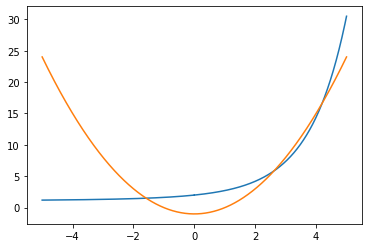

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 2001)
plt.plot(x, (np.exp(x) + x - 1)/x)
plt.plot(x, x**2 - 1)

In [19]:
from scipy.optimize import fsolve
def f(p):
    x, y = p
    return (np.exp(x) + x*(1 - y) - 1, x**2 - 1 - y)

x1, y1 = fsolve(f, (2, 2))
x2, y2 = fsolve(f, (4, 15))
x3, y3 = fsolve(f, (-2, 5))
x4, y4 = fsolve(f, (0, -1))
print(f"Корни системы уравнений: {x1, y1}\n {x2, y2}\n {x3, y3}\n {x4, y4}")

Корни системы уравнений: (2.6181455730850116, 5.854686241864718)
 (4.200105841149689, 16.640889076862805)
 (-1.5818353528958997, 1.5022030836712943)
 (0.0, -1.0)


### Код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [9]:
from random import randint

for i in range(0, 3): 
    input("Подкидывание шарика")
    print(f"Результат: {randint(0, 36)}")

Подкидывание шарика
Результат: 2
Подкидывание шарика
Результат: 32
Подкидывание шарика
Результат: 20


### Код, проверяющий теорему умножения вероятности на примере подбрасывания монетки

Возьмем задачу с подбрасыванием слегка изогнутой монеты (видела такую задачу к собеседованию) с вероятностью выпадения "орла" - q, "решки" - p. q не равно p. Будем подбрасывать монету два раза подряд, посчитаем вероятности выпадения разных сочетаний, проверим на этом примере теорему умножения.

In [14]:
p = 2/3
q = 1 - p
v1 = p*p                    # Вероятность выпадения орла в двух последовательных испытаниях 
v2 = q*q                    # Вероятность выпадения решки в двух последовательных испытаниях 
v3 = p*q                    # Вероятность выпадения сначала орла, а затем решки в двух последовательных испытаниях 
v4 = q*p                    # Вероятность выпадения сначала решки, затем орла в двух последовательных испытаниях 
if v1 + v2 + v3 + v4 == 1:  # Сумма вероятностей полной группы событий должна быть равна 1 
    print("Теорема умножения вероятностей верна")
    
# P. S. На этом примере видим, что можно играть даже с изогнутой монеткой, т.к. pq = qp  

Теорема умножения вероятностей верна


### Постоение гистограммы 

Text(0.5, 1.0, 'Распределение суммы случайных чисел из 10 выборок')

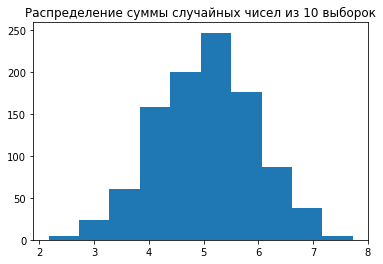

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

general = []
for i in range (0,10):
    general.append(np.random.rand(1000))
    
a = np.array(general)
res = np.sum(a, axis=0)
plt.hist(res)
plt.title("Распределение суммы случайных чисел из 10 выборок")

### Дополнение метода Монте-Карло методом Бернулли

In [45]:
%matplotlib inline
import numpy as np
import math

k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
mk = k/n

# Метод Бернулли 

m = 2       # Ожидаемое количество выпадений орла
n = 4       # Количество испытаний
p = 1/2     # Вероятность выпадения орла
q = 1 - p   # Вероятность НЕвыпадения орла

ber = math.factorial(n)/(math.factorial(n-m)*math.factorial(m)) * p**m * q**(n-m)

print(f"Вероятность выпадения орла два раза в четырех испытаниях по методу Монте-Карло - {mk},\nпо формуле Бернулли - {ber}")

Вероятность выпадения орла два раза в четырех испытаниях по методу Монте-Карло - 0.37562,
по формуле Бернулли - 0.375


В данном же коде можно менять значения n (чем больше это значение, тем ближе результат Монте-Карло к Бернулли, т.е. резултат точнее), и значение k (на строчке с if x[i] == 2:)- то есть искать вероятность выпадения не 2 из 4, а, скажем, 1 из 4 (в методе Бернулли это будет соответствовать переменной m). Не буду дублировать код ради этих примеров))

### Варианты перестановок 

In [48]:
import itertools

for p in itertools.permutations('1234', 3):  
    print(''.join(p))

123
124
132
134
142
143
213
214
231
234
241
243
312
314
321
324
341
342
412
413
421
423
431
432


### Расчет коэффициента корреляции

[[1.         0.99437019]
 [0.99437019 1.        ]]
0.9943701929979405


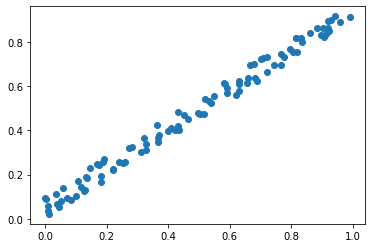

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 

n = 100
r = 0.9
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
c = np.corrcoef(x, y)
print(c)

# Коэффициент корелляции ручным способ

xm = mean(x)
ym = mean(y) 
xmm = [x - xm for x in x]
ymm = [y - ym for y in y]
n = [x * y for x, y in zip(xmm, ymm)]
m = [x**2 for x in xmm]
l = [y**2 for y in ymm]
r = sum(n)/(sum(m)*sum(l))**(0.5)
print(r)